#  Mathematical Fractals with Julia

### Topics for this Workshop
* What are fractals?
* What is fractal dimension and how is it different from toplogical dimension?
* Fractals and inherent recursive nature.
* Cantor Set Fractal
* Koch Curve and Snowflake
* Hilbert Curve
* Spikenski Triangle 2D and 3D
* Mandelbrot Set and Julia set
* Relation between Mandelbrot set and Julia set.
* Pythagorean Tree

In [ ]:
import Pkg
Pkg.add("Plots")
Pkg.add("CairoMakie")
Pkg.add("Makie")
Pkg.add("LinearAlgebra")
using Plots
using CairoMakie
using Makie.GeometryBasics
using IJulia
using LinearAlgebra

notebook()

## Cantor Set Fractal
#### Divide a line segment in 2^k parts each with length = 3^(-k)
* 0__________________________1   (1,1)
* 0_________        _________1   (2,1/3)
* 0___   ___        ___   ___1   (4,1/9)
* 0_ _   _ _        _ _   _ _1   (8,1/27)
* 0: :   : :        : :   : :1   (2^k,1/3^k)

In [ ]:
list1 = []
function appendline(b,e,level)
    push!(list1,b)
    push!(list1,e)
    push!(list1,level)
end

In [ ]:
function split1(b,e,level,threshold,ratio,skewness)
    if (e-b < threshold)
        return
    end
    partsize = (e-b)*ratio
    appendline(b,e,level)
    if(skewness>0)
        split1(b,(b+partsize/skewness),level+1,threshold,ratio,skewness)
        split1(e-partsize,e,level+1,threshold,ratio,skewness)

    else
        split1((e-partsize/skewness),e,level+1,threshold,ratio,skewness)
        split1(b,b+partsize,level+1,threshold,ratio,skewness)

    end
end
    

In [ ]:
function plotline(l)
    f = Figure(resolution = (3000, 3000))
    Axis(f[1, 1])
    for x in 1:3:length(l)
        Plots.plot!([l[x],l[x+1]],[l[x+2],l[x+2]],lw=3,legend = false)
    end
    f
end

In [ ]:
list1 = []
split1(0,100,1,0.0001,0.4,1.25)
plotline(list1)
Plots.plot!()

## Koch Curve

### Divide the line into three parts; remove the middle partion with other two side of equilateral triangle

_______________
      /\
     /  \
____/    \_____
       _/\_
      \   /
__/\__/   \__/\__

...

and So on


In [ ]:
list1 = []
function findcoord1(beg1,beg2)
    x1 = (beg1[1]+beg2[1] + √3*(beg1[2]-beg2[2]))/2
    x2 = (beg1[1]+beg2[1] - √3*(beg1[2]-beg2[2]))/2
    y1 = (beg1[2]+beg2[2] + √3*(beg1[1]-beg2[1]))/2
    y2 = (beg1[2]+beg2[2] - √3*(beg1[1]-beg2[1]))/2
    point1 = [x1,y2]
    point2 = [x2,y1]

    if(norm(point1-[0,0])>norm(point2-[0,0]))
        return point1
    else
        return point2
    end
end

function findcoord(beg1,beg2,c)
    x1 = (beg1[1]+beg2[1] + √3*(beg1[2]-beg2[2]))/2
    x2 = (beg1[1]+beg2[1] - √3*(beg1[2]-beg2[2]))/2
    y1 = (beg1[2]+beg2[2] + √3*(beg1[1]-beg2[1]))/2
    y2 = (beg1[2]+beg2[2] - √3*(beg1[1]-beg2[1]))/2
    point1 = [x1,y2]
    point2 = [x2,y1]

    if(norm(point1-c)>norm(point2-c))
        return point2
    else
        return point1
    end
end


In [ ]:
function split2(b,e,c,level,threshold)
    if (norm(e-b) < threshold || level == 0)
        push!(list1,b)
        push!(list1,e)
        return 
    end
    #tricenter = findcoord(e,b)
    #print(tricenter)
    #println(beg1," ",beg2," ")
    if(c==0)
        beg1 = [0.6667*(b[1])+0.33333(e[1]),0.6667*(b[2])+0.33333(e[2])]
        beg2 = [0.33333*(b[1])+0.66667(e[1]),0.333333*(b[2])+0.66667(e[2])]
        inter = findcoord1(beg1,beg2)
        split2(b,beg1,inter,level-1,threshold)
        split2(inter,beg2,e,level-1,threshold)
    else
        centroid = (b+e+c)/3
        beg1 = [0.6667*(b[1])+0.33333(e[1]),0.6667*(b[2])+0.33333(e[2])]
        beg2 = [0.33333*(b[1])+0.66667(e[1]),0.333333*(b[2])+0.66667(e[2])]
        beg11 = [0.6667*(e[1])+0.33333(c[1]),0.6667*(e[2])+0.33333(c[2])]
        beg22 = [0.33333*(e[1])+0.66667(c[1]),0.333333*(e[2])+0.66667(c[2])]
        inter1 = findcoord(beg1,beg2,centroid)
        inter2 = findcoord(beg11,beg22,centroid)
        split2(b,beg1,inter1,level-1,threshold)
        split2(inter1,beg2,e,level-1,threshold)
        split2(e,beg11,inter2,level-1,threshold)
        split2(inter2,beg22,c,level-1,threshold)
    end
end

In [ ]:
Plots.plot()
function plotkoch(l)
    for x in 1:1:length(l)-1
        Plots.plot!([l[x][1],l[x+1][1]],[l[x][2],l[x+1][2]],lw=3,legend = false)
    end
end

In [ ]:
split2([0,1],[0.866,-0.5],0,4,0.01)
split2([0.866,-0.5],[-0.866,-0.5],0,4,0.01)
split2([-0.866,-0.5],[0,1],0,4,0.01)

In [ ]:
plotkoch(list1)
Plots.plot!([list1[1][1],list1[length(list1)][1]],[list1[1][2],list1[length(list1)][2]],lw=3,legend=false)

## Hilbert Fractal
# Rules
      ___
A->  |A A|
     |D B|.
     |   v
      ____ 
  B->|B C
     |B A
     |~~~>
     
  C->^D B|
     |C C|
      ~~~
      <---
  D-> C D|
      A D|
      ~~~

In [ ]:
function plotA(coord1, coord2, coord3,coord4)
    centroid = (coord1+coord2+coord4+coord3)/4
    point1 = (coord1+centroid)/2
    point2 = (coord2+centroid)/2
    point3 = (coord3+centroid)/2
    point4 = (coord4+centroid)/2
    return point3,point1,point2,point4
end
function plotB(coord1, coord2, coord3,coord4)
    centroid = (coord1+coord2+coord4+coord3)/4
    point1 = (coord1+centroid)/2
    point2 = (coord2+centroid)/2
    point3 = (coord3+centroid)/2
    point4 = (coord4+centroid)/2
    return point2,point1,point3,point4
end
function plotC(coord1, coord2, coord3,coord4)
    centroid = (coord1+coord2+coord4+coord3)/4
    point1 = (coord1+centroid)/2
    point2 = (coord2+centroid)/2
    point3 = (coord3+centroid)/2
    point4 = (coord4+centroid)/2
    return point2,point4,point3,point1
end        

function plotD(coord1, coord2, coord3,coord4)
    centroid = (coord1+coord2+coord4+coord3)/4
    point1 = (coord1+centroid)/2
    point2 = (coord2+centroid)/2
    point3 = (coord3+centroid)/2
    point4 = (coord4+centroid)/2
    return point3,point4,point2,point1
end

In [ ]:
list1 = []
function generateNext(letter,coord1,coord2,coord3,coord4,level)
    if(level ==1)
        if(letter == 'A')
            push!(list1, (plotA(coord1, coord2, coord3,coord4))...)
        elseif(letter == 'B')
            push!(list1, (plotB(coord1, coord2, coord3,coord4))...)
        elseif(letter == 'C')
            push!(list1, (plotC(coord1, coord2, coord3,coord4))...)
        else
            push!(list1, (plotD(coord1, coord2, coord3,coord4))...)
        end            
        return
    end
    centroid = (coord1+coord2+coord3+coord4)/4
    mid1 = (coord1+coord2)/2
    mid2 = (coord2+coord4)/2
    mid3 = (coord3+coord4)/2
    mid4 = (coord1+coord3)/2
    if(letter == 'A')
        generateNext('D',mid4,centroid,coord3,mid3,level-1)
        generateNext('A',coord1,mid1,mid4,centroid,level-1)
        generateNext('A',mid1,coord2,centroid,mid2,level-1)
        generateNext('B',centroid,mid2,mid3,coord4,level-1)
    elseif(letter == 'B')
        generateNext('C',mid1,coord2,centroid,mid2,level-1)
        generateNext('B',coord1,mid1,mid4,centroid,level-1)
        generateNext('B',mid4,centroid,coord3,mid3,level-1)
        generateNext('A',centroid,mid2,mid3,coord4,level-1)
    elseif(letter == 'C')
        generateNext('B',mid1,coord2,centroid,mid2,level-1)
        generateNext('C',centroid,mid2,mid3,coord4,level-1)
        generateNext('C',mid4,centroid,coord3,mid3,level-1)
        generateNext('D',coord1,mid1,mid4,centroid,level-1)
    else       
        generateNext('A',mid4,centroid,coord3,mid3,level-1)
        generateNext('D',centroid,mid2,mid3,coord4,level-1) 
        generateNext('D',mid1,coord2,centroid,mid2,level-1)
        generateNext('C',coord1,mid1,mid4,centroid,level-1)
    end                
end

In [ ]:
generateNext('A',[0,1],[1,1],[0,0],[1,0],6)
listx = []
listy = []

for x in list1
    push!(listx,x[1])
    push!(listy,x[2])
end


In [ ]:
Plots.plot([0,1,1,0,0],[1,1,0,0,1],lw = 5,legend = false)

Plots.plot!(listx,listy,legend = false,lw = 1)

## sierpinski Triangle 
          *
         * *
        *****
       *     *
      * *   * *
     ***** *****


In [ ]:
listx = []
listy = []
function getsubtriangles(sides,level)
    if(level ==0)
        x = []
        y = []
        push!(x, sides[1][1])
        push!(x, sides[2][1])
        push!(x, sides[3][1])
        push!(x, sides[1][1])
        push!(y, sides[1][2])
        push!(y, sides[2][2])
        push!(y, sides[3][2])
        push!(y, sides[1][2])
        push!(listx,x)
        push!(listy,y)
        return
    end
    mid1 = (sides[2]+sides[3])/2
    mid2 = (sides[1]+sides[3])/2
    mid3 = (sides[1]+sides[2])/2
    getsubtriangles([sides[1],mid2,mid3],level-1)
    getsubtriangles([sides[2],mid1,mid3],level-1)
    getsubtriangles([sides[3],mid1,mid2],level-1)
end

In [ ]:
sides = [[0,1],[0.866,-0.5],[-0.866,-0.5]]
getsubtriangles(sides,9)
Plots.plot()
for i in 1:length(listx)
    Plots.plot!(listx[i],listy[i],lw=0.05,legend = false)
end

In [ ]:
Plots.plot!()


## Mandelbrot Set and Julia Set

### Relation Between Two

In [ ]:
Pkg.add("Colors")
Pkg.add("ColorSchemes")
Pkg.add("PerceptualColourMaps")

In [ ]:
function evaluateboundedness(z,iterations,c,previous)
    if(iterations ==0)
        if(√abs(z^2+c)>2)
            return log(√abs(z^2+c))
        else
            return log(√abs(z^2+c))
        end
    end
    next = √abs((z^2)+c)
    evaluateboundedness(z^2+c,iterations-1,c,next)       
end

In [ ]:
xlist = []
ylist = []
c = []
constant = 0 + 0im
for a in -2:0.02:1
    for b in -1:0.02:1
        y = evaluateboundedness(constant,100,a+b*im,0)
        if(y !=true)
            push!(xlist,a)
            push!(ylist,b)
            if(isnan(y) || y ==Inf)
                push!(c,256)
            else
                push!(c,y)
            end
        end
    end
end
my_colors = [cgrad(:thermal, [0,256])[z] for z in c]
#print(my_colors)

In [ ]:
Plots.plot()
gr(size=(500,500),legend=false,markerstrokewidth=0,markersize=2)
Plots.scatter(xlist,ylist,markersize=2,color = my_colors,legend = false)

In [ ]:
xlist = []
ylist = []
c = []
constant = -0.8 + 0.156im
for a in -1.5:0.02:1.5
    for b in -1.5:0.02:1.5
        y = evaluateboundedness(a+b*im,100,constant,0)
        if(y !=true)
            push!(xlist,a)
            push!(ylist,b)
            if(isnan(y) || y ==Inf)
                push!(c,256)
            else
                push!(c,y)
            end
        end
    end
end
my_colors = [cgrad(:thermal, [0,256])[z] for z in c]

In [ ]:
Plots.plot()
gr(size=(500,500),legend=false,markerstrokewidth=0,markersize=2)
Plots.scatter(xlist,ylist,markersize=2,color = my_colors,legend = false)

## Pythagorean Tree

In [ ]:
point1 = (0,30)
point2 = (20,0)
point3 = (0,0)

(0, 0)

In [ ]:
function distance(A,B)
    return √((A[1]-B[1])^2+(A[2]-B[2])^2)
end

distance (generic function with 1 method)

In [ ]:
triangle = Point2f[point1,point2,point3]

3-element Vector{Point{2, Float32}}:
 [0.0, 30.0]
 [20.0, 0.0]
 [0.0, 0.0]

In [ ]:
function plotPolygon(polygon)
    f = Figure(resolution = (300, 300))
    Axis(f[1, 1])
    poly!(polygon)

    f
end

plotPolygon (generic function with 1 method)

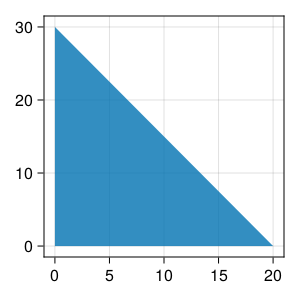

In [ ]:
plotPolygon(triangle)

In [ ]:
squarebase = Point2f[point1,point3,(-30,0),(-30,30)]
squareperpendicular = Point2f[point3,point2,(20,-20),(0,-20)]
squarehypo = Point2f[point1,point2,(40,30),(20,60)]

4-element Vector{Point{2, Float32}}:
 [0.0, 30.0]
 [20.0, 0.0]
 [40.0, 30.0]
 [20.0, 60.0]

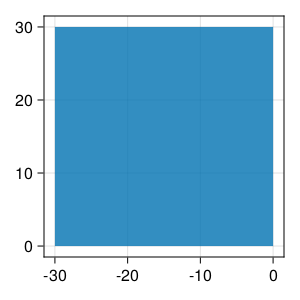

In [ ]:
plotPolygon(squarebase)

In [ ]:
function plotPolygonlist(polygons)
    f = Figure(resolution = (300, 300))
    Axis(f[1, 1])
    for x in polygons
       poly!(x)
    end
    f
end

plotPolygonlist (generic function with 1 method)

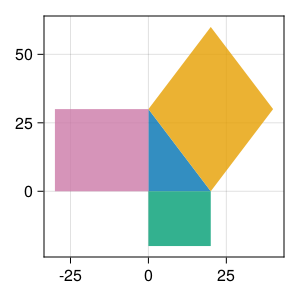

In [ ]:
plotPolygonlist([triangle,squarehypo,squareperpendicular,squarebase])

In [ ]:
square = getsquare((0,0),(1,1))

4-element Vector{Point{2, Float32}}:
 [0.0, 0.0]
 [1.0, 0.0]
 [1.0, 1.0]
 [0.0, 1.0]

In [ ]:
function findTriangle(Squareside,centroid,angle)
 point1 = Squareside[1]
 point2 = Squareside[2]
 centerpoint = (point1+point2)/2
 radius = distance(centerpoint,point1)
 slope = (centerpoint[2]-point1[2])/(centerpoint[1]-point1[1])
 θ = atan(slope)
 θnew = θ+0.5π-angle
 x = centerpoint[1]+radius*cos(θnew)
 x1= centerpoint[1]-radius*cos(θnew)
 y = centerpoint[2]+radius*sin(θnew)
 y1 = centerpoint[2]-radius*sin(θnew)
 if(distance(centroid,[x,y])<(distance(centroid,[x1,y1])))
 relevantpoint = [x1,y1]
 else
 relevantpoint = [x,y]
 end
 return relevantpoint
end

findTriangle (generic function with 2 methods)

In [ ]:
centroidsq(square) = (square[1]+square[2]+square[3]+square[4])/4
centroidtri(triangle) = (triangle[1]+triangle[2]+triangle[3])/3
centroid = centroidsq(square)

2-element Point{2, Float32} with indices SOneTo(2):
 0.5
 0.5

In [ ]:
function findTriangleandSquare(Squareside,centroid,angle)
 point1 = Squareside[1]
 point2 = Squareside[2]
 centerpoint = (point1+point2)/2
 radius = distance(centerpoint,point1)
 slope = (centerpoint[2]-point1[2])/(centerpoint[1]-point1[1])
 θ = atan(slope)
 θnew = θ+0.5π-angle
 x = centerpoint[1]+radius*cos(θnew)
 x1= centerpoint[1]-radius*cos(θnew)
 y = centerpoint[2]+radius*sin(θnew)
 y1 = centerpoint[2]-radius*sin(θnew)

 if(distance(centroid,[x,y])<(distance(centroid,[x1,y1])))
 relevantpoint = [x1,y1]
 else
 relevantpoint = [x,y]
 end
 centroid2 = (relevantpoint+point1+point2)/3
 distance1 = distance(relevantpoint,point1)
 distance2 = distance(relevantpoint,point2)
 slope1 = (point1[2]-relevantpoint[2])/(point1[1]-relevantpoint[1])
 slope2 = (relevantpoint[2]-point2[2])/(relevantpoint[1]-point2[1])
 θ1 = atan(slope1) -π/2
 θ2 = atan(slope2) -π/2
 newx1 = point1[1]+ distance1*cos(θ1)
 newy1 = point1[2]+ distance1*sin(θ1)
 newx11 = point1[1]- distance1*cos(θ1)
 newy11 = point1[2]- distance1*sin(θ1)
 centroid11 = (relevantpoint+point1+[newx1,newy1])/3
 centroid12 = (relevantpoint+point1+[newx11,newy11])/3

 if(distance(centroid11,centroid2)<distance(centroid12,centroid2))
 pnt1 = [newx11,newy11]
 else
 pnt1 = [newx1,newy1]
 end
 newx2 = point2[1]+ distance2*cos(θ2)
 newy2 = point2[2]+ distance2*sin(θ2)
 newx22 = point2[1]- distance2*cos(θ2)
    newy22 = point2[2]- distance2*sin(θ2)
 centroid21 = (relevantpoint+[newx2,newy2]+point2)/3
 centroid22 = (relevantpoint+[newx22,newy22]+point2)/3
 if(distance(centroid21,centroid2)<distance(centroid22,centroid2))
 pnt2 = [newx22,newy22]
 else
 pnt2 = [newx2,newy2]
 end

 return relevantpoint,pnt1,pnt2
end

findTriangleandSquare (generic function with 1 method)

In [ ]:
angle = 0
squareside = [square[1],square[2]]
Pythagoreansetup = findTriangleandSquare(squareside,centroid,angle*π/180)

([0.5, 1.5], [-0.5000000000000001, 1.5], [1.5, 1.5])

In [ ]:
triangle = Point2f[Pythagoreansetup[1], squareside[1],squareside[2]]
square1 = getsquare(Pythagoreansetup[1], Pythagoreansetup[2])
square2 = getsquare(Pythagoreansetup[1], Pythagoreansetup[3])

4-element Vector{Point{2, Float32}}:
 [0.5, 1.5]
 [1.0, 1.0]
 [1.5, 1.5]
 [1.0, 2.0]

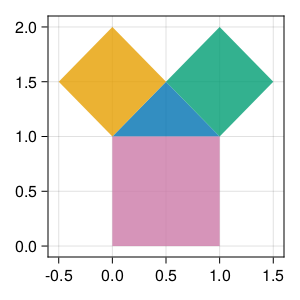

In [ ]:
plotPolygonlist([triangle,square1,square2,square])

In [ ]:
angle = 30
pnt1 = [3,10]
pnt2 = [2,500]
centroid = (pnt1+pnt2)/2
square = getsquare(pnt1,pnt2)
squareside = [square[1],square[2]]
Pythagoreansetup = findTriangleandSquare(squareside,centroid,angle*π/180)

([170.42961871051193, -34.49659924315665], [-41.49659924315665, -157.42961871051193], [537.4965992431567, 178.42961871051196])

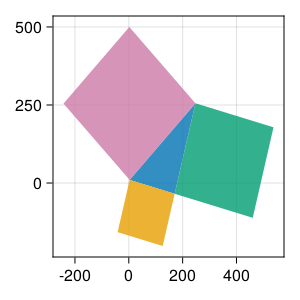

In [ ]:
triangle = Point2f[Pythagoreansetup[1], squareside[1],squareside[2]]
square1 = getsquare(Pythagoreansetup[1], Pythagoreansetup[2])
square2 = getsquare(Pythagoreansetup[1], Pythagoreansetup[3])
plotPolygonlist([triangle,square1,square2,square])

In [ ]:
function getsquare(point1,point2,otherpoint)
 xc = (point1[1] + point2[1])/2
 yc = (point1[2] + point2[2])/2
 xd = (point1[1] - point2[1])/2
 yd = (point1[2] - point2[2])/2
 x3 = xc - yd
 y3 = yc + xd
 x4 = xc + yd
 y4 = yc - xd
 square = Point2f[point1,(x3,y3),point2,(x4,y4)]
 if(dista(square[4],otherpoint)> dista(square[2],otherpoint))
 pnt = square[4]
 else
 pnt = square[2]
 end
 centroidnew = (square[1]+square[2]+square[3]+square[4])/4
 squaresidenew = [square[3],pnt]
 return square,centroidnew,squaresidenew
end

getsquare (generic function with 2 methods)

In [ ]:
function pythagoreanTree(square,skewness,edgelength)
    squaresideorig = [square[1],square[2]]
    centroidorig = (square[1]+square[2]+square[3]+square[4])/4
    squarelist = Any[]
    trianglelist = Any[]
    centroidlist = Any[]
    squarelist1 = Any[]
    push!(squarelist1,squaresideorig)
    push!(centroidlist,centroidorig)
    push!(squarelist,square)
    while(length(squarelist1)>0)
        squaresiden = popfirst!(squarelist1)
        centroidn = popfirst!(centroidlist)
        skewness = rand((-40,40))
        if(distance(squaresiden[1],squaresiden[2])>edgelength)
            point = findTriangle(squaresiden,centroidn,skewness*π/180)
            triangle = Point2f[point[1], squaresiden[2],squaresiden[1]]
            square1,centroid1,squareside1 = getsquare(point[1], point[2], centroidn)
            square2,centroid2,squareside2 = getsquare(point[1], point[3], centroidn)
            push!(squarelist,square1)
            push!(squarelist,square2)
            push!(trianglelist,triangle)
            push!(centroidlist,centroid1)
            push!(centroidlist,centroid2)
            push!(squarelist1,squareside1)
            push!(squarelist1,squareside2)
        end
    end
    return squarelist,trianglelist
end

pythagoreanTree (generic function with 1 method)

In [ ]:
function plotTrianglesandSquares(Triangle,Square)
 f = Figure()
 Axis(f[1, 1], aspect = 1)
 for x in Triangle
 t = max(distance(x[1],x[3]),dista(x[1],x[2]),dista(x[2],x[3]))
 if(t<0.2)
 t=0
 else
 t=1
 end
 poly!(x, color = RGB(139*t/255 , (69t+(1-t)*128)/255 ,19t/255), strokecolor = RGB(139*t/255 , (69t+(1-t)*128)/255 ,19t/255), strokewidth = 1)
 end
 for y in Square
 t = distance(y[1],y[2])
 if(t<0.2)
 t=0
 else
 t=1
 end
 poly!(y, color = RGB(139*t/255 , (69t+(1-t)*128)/255 ,19t/255), strokecolor = RGB(139*t/255 , (69t+(1-t)*128)/255 ,19t/255), strokewidth = 1)
 end
 f
end

plotTrianglesandSquares (generic function with 1 method)

In [ ]:
square = Point2f[(0,1),(1,1),(1,0),(0,0)]
skewness= 0
edgelength = 0.2
squarelist,trianglelist = pythagoreanTree(square,skewness,edgelength)
print("Squares :: " , length(squarelist)," Triangles :: ",length(trianglelist)

LoadError: MethodError: [0mCannot `convert` an object of type [92mFloat64[39m[0m to an object of type [91mPoint{2, Float32}[39m
[0mClosest candidates are:
[0m  convert(::Type{Point{S, T}}, [91m::Tuple{Vararg{T, S}}[39m) where {S, T} at ~/.julia/packages/GeometryBasics/3PqdK/src/fixed_arrays.jl:94
[0m  convert(::Type{Point{S, T}}, [91m::Tuple[39m) where {S, T} at ~/.julia/packages/GeometryBasics/3PqdK/src/fixed_arrays.jl:97
[0m  convert(::Type{Point{S, T}}, [91m::Point[39m) where {S, T} at ~/.julia/packages/GeometryBasics/3PqdK/src/fixed_arrays.jl:67
[0m  ...

In [ ]:
plotTrianglesandSquares(trianglelist,squarelist)

LoadError: UndefVarError: trianglelist not defined